# ILI Data Processing

**Import Dependencies**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Loading the Processed ILI Data**

In [2]:
csv_file_name = r"external_anomoly_processed.csv"
AnomaliesProc  = pd.read_csv(csv_file_name)

**Rename Columns**

In [3]:
# Rename the columns
AnomaliesProc.rename(columns={
    'Year': 'InspectionYear',
    'GWNUM': 'GirthWeldNumber',
    'JL.m': 'JointLength_m',
    'RD.m': 'RelativeDistance_m',
    'SO.deg': 'SeamOrientation_deg',
    'SPD.m': 'StartPointDistance_m',
    'SPO.deg': 'StartPointOrientation_deg',
    'EPD.m': 'EndPointDistance_m',
    'EPO.deg': 'EndPointOrientation_deg',
    'SIPRD.M': 'SignificantPointRelDistance_m',
    'SIPO.deg': 'SignificantPointOrientation_deg',
    'WT.mm': 'WallThickness_mm',
    'L.mm': 'FeatureLength_mm',
    'W.mm': 'FeatureWidth_mm',
    'MD.mm': 'MaxDepth_mm'
}, inplace=True)

## EDA

**All Features**

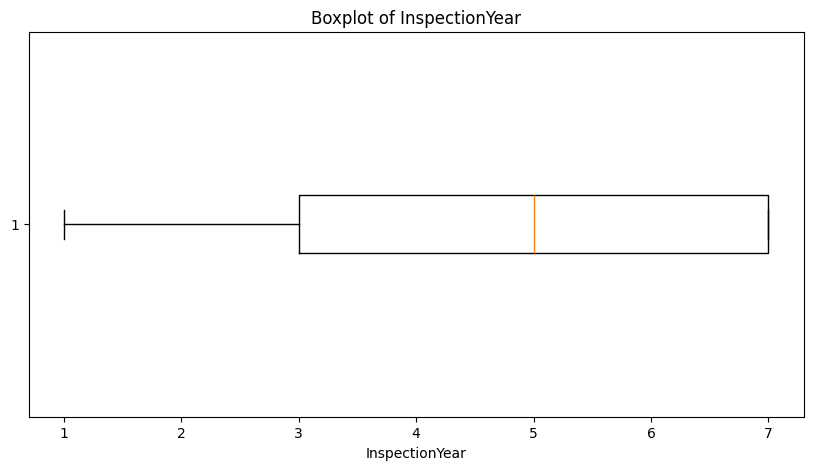

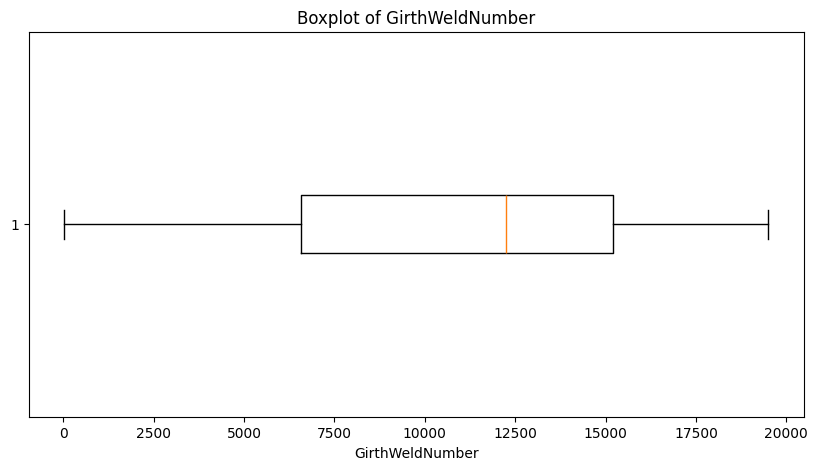

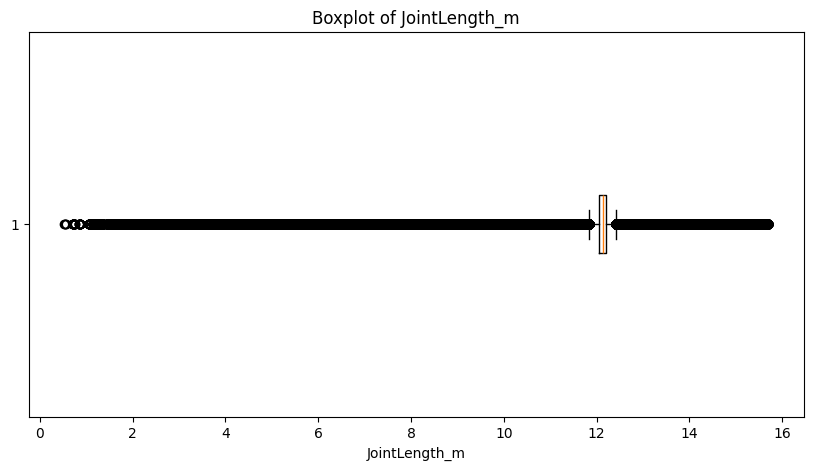

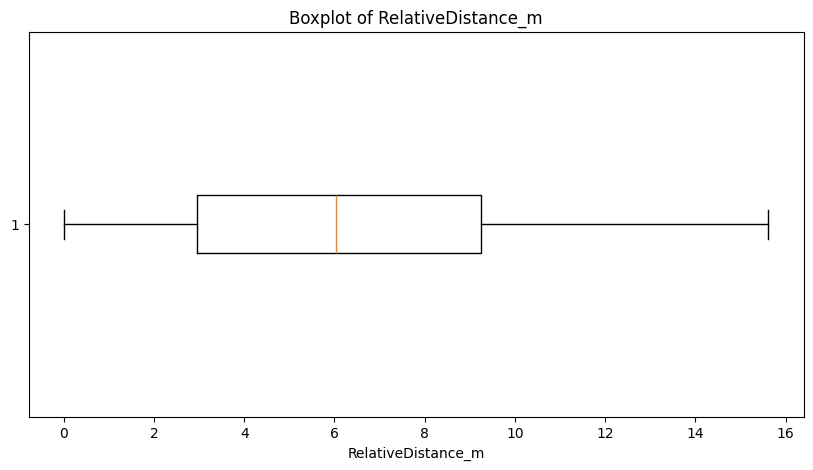

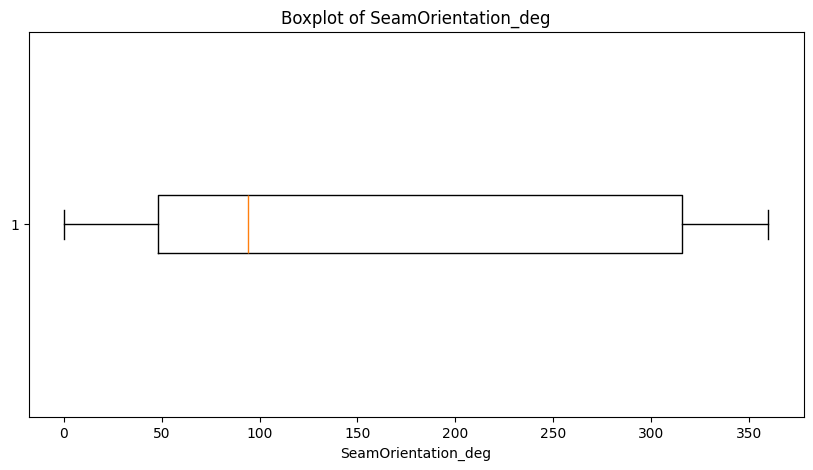

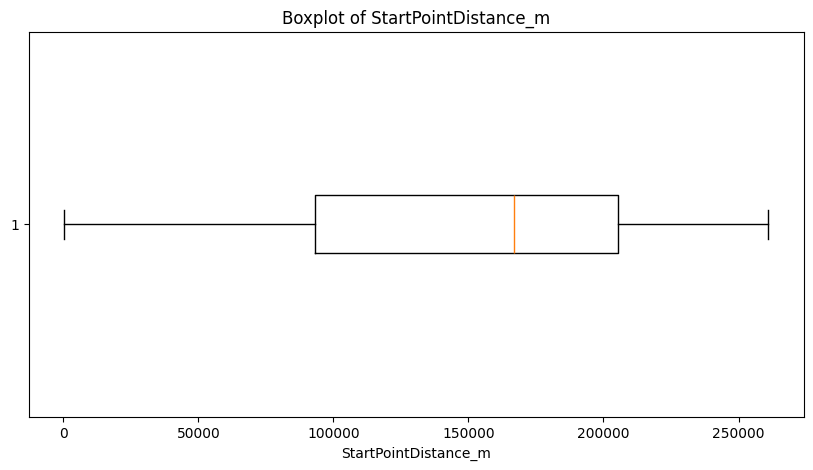

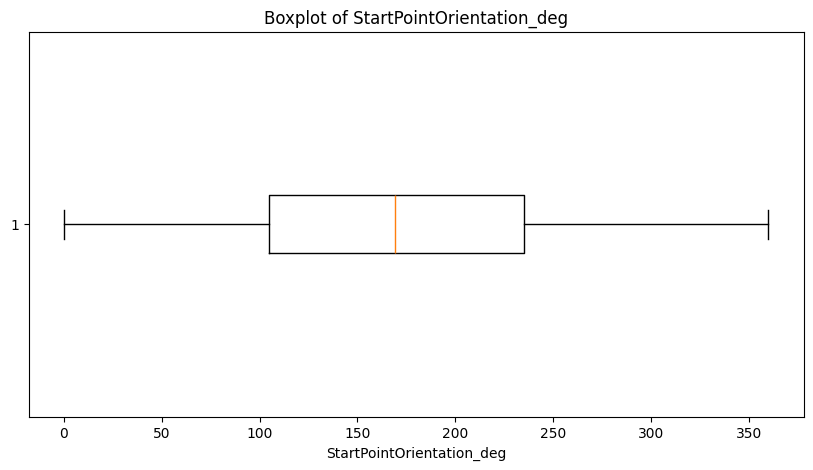

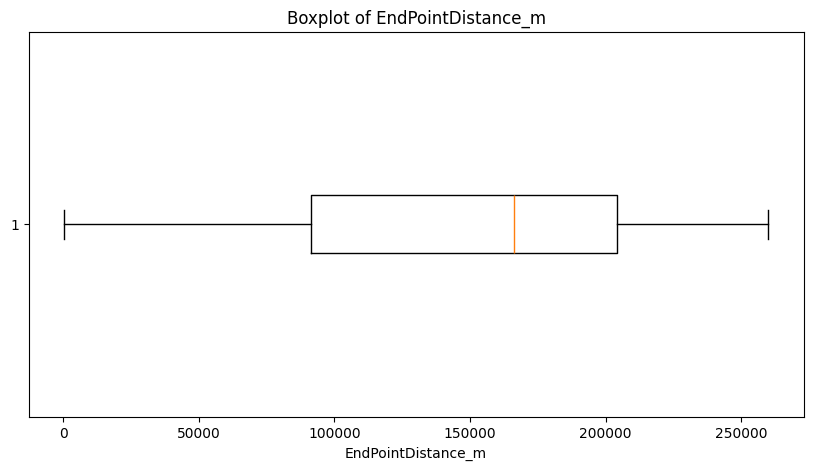

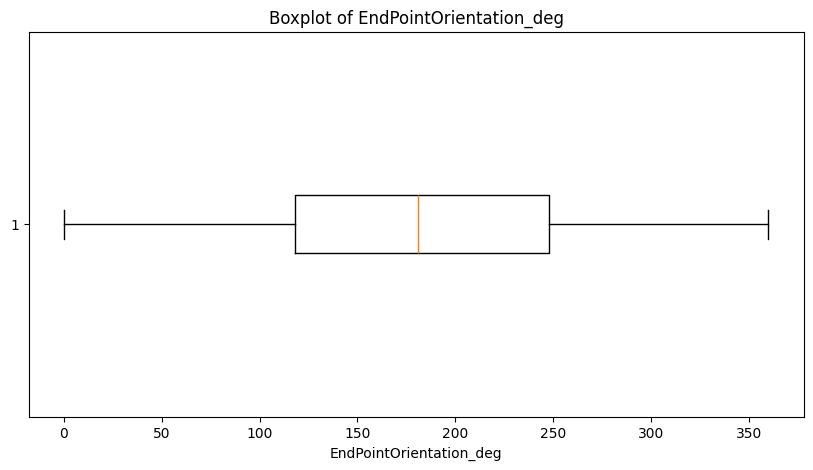

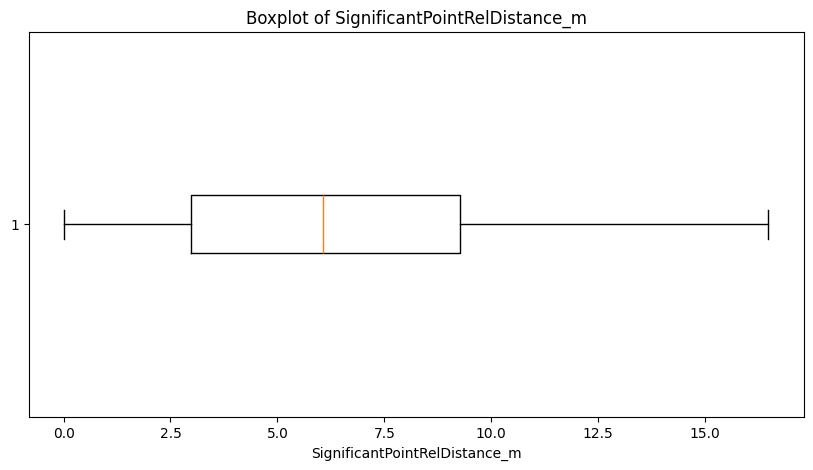

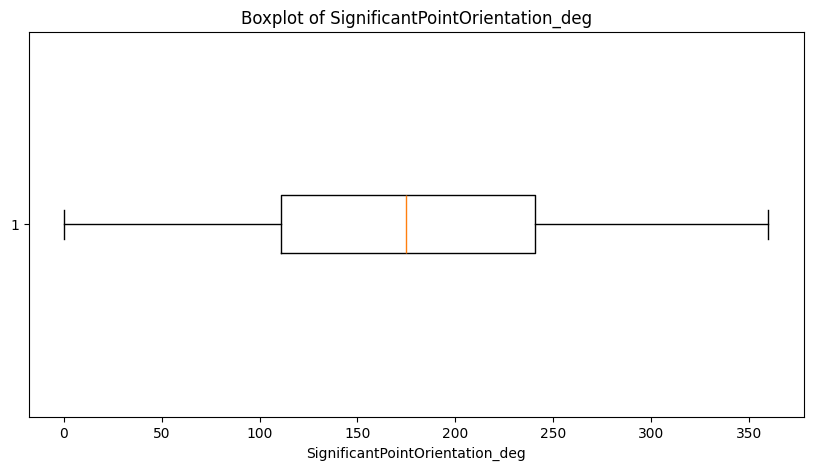

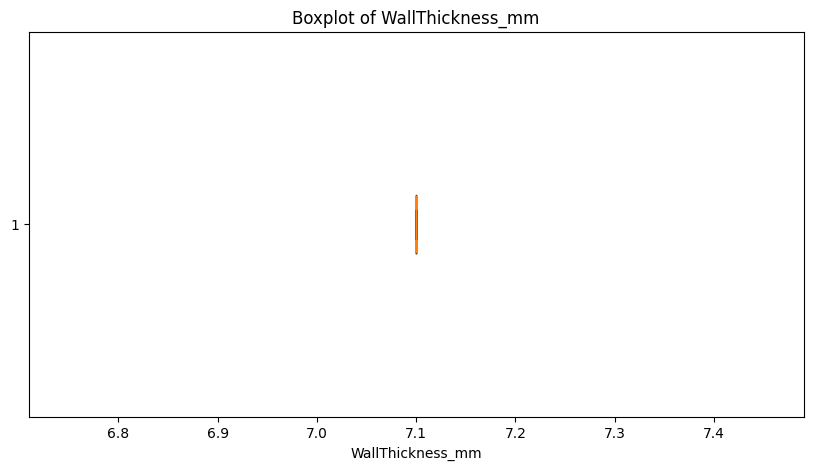

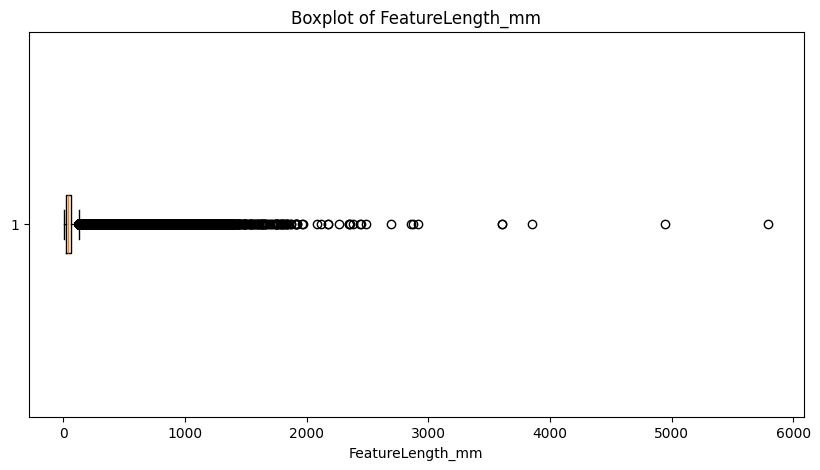

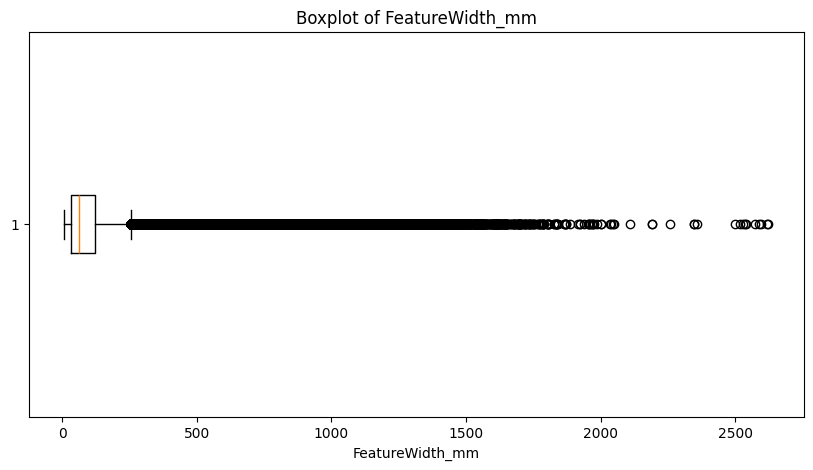

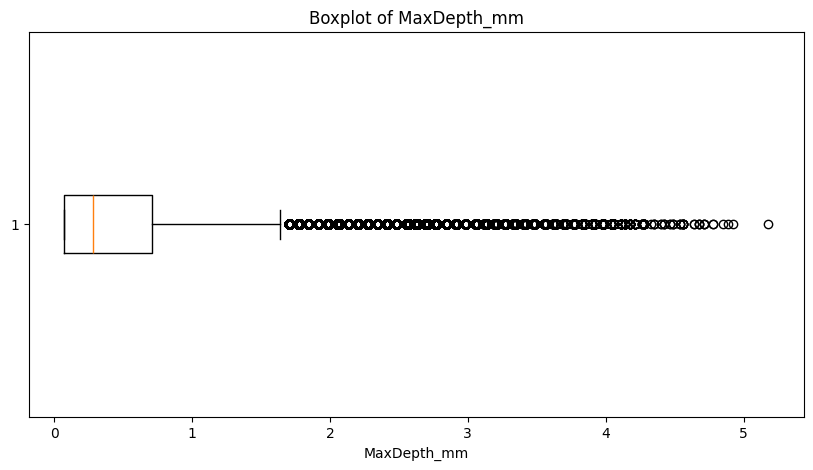

In [31]:
# Plot box plots for all features in the DataFrame separately
for column in AnomaliesProc.columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(AnomaliesProc[column].dropna(), vert=False)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

**Max Depth (mm)**

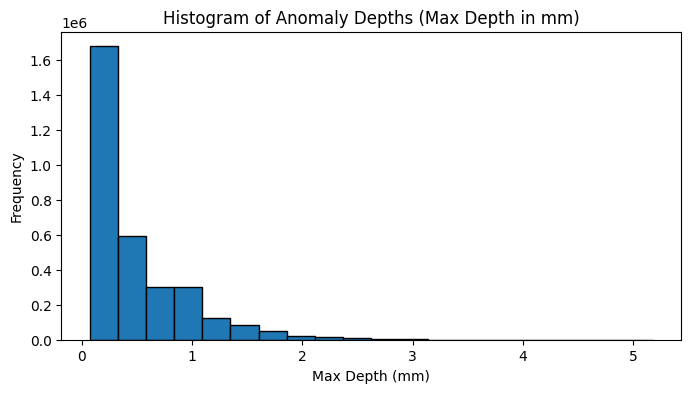

In [4]:
# Plot the histogram of MaxDepth_mm
plt.figure(figsize=(8, 4))
plt.hist(AnomaliesProc['MaxDepth_mm'], bins=20, edgecolor='black')
plt.xlabel('Max Depth (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Depths (Max Depth in mm)')
plt.show()

In [5]:
# import seaborn as sns

# # Density plot for MaxDepth_mm
# plt.figure(figsize=(10, 5))
# sns.kdeplot(AnomaliesProc['MaxDepth_mm'], fill=True)
# plt.xlabel('Max Depth (mm)')
# plt.title('Density Plot of Anomaly Depths (Max Depth in mm)')
# plt.show()

In [6]:
# Summary statistics
print(AnomaliesProc['MaxDepth_mm'].describe())

count    3.198420e+06
mean     4.612879e-01
std      4.766933e-01
min      7.000000e-02
25%      7.000000e-02
50%      2.800000e-01
75%      7.100000e-01
max      5.180000e+00
Name: MaxDepth_mm, dtype: float64


In [ ]:
# Calculate the 25th and 75th percentiles
Q1 = AnomaliesProc['MaxDepth_mm'].quantile(0.25)
Q2 = AnomaliesProc['MaxDepth_mm'].quantile(0.50)
Q3 = AnomaliesProc['MaxDepth_mm'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the lower bound and upper bound
lower_bound = max(0, Q1 - 1.5 * IQR)  # Ensure lower bound is not negative
upper_bound = Q3 + 1.5 * IQR

# Print the calculated values
print(f"25th Percentile (Q1): {Q1}")
print(f"50th Percentile (Q2): {Q2}")
print(f"75th Percentile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {round(IQR,2)}")
print(f"Lower Bound: {round(lower_bound,2)}")
print(f"Upper Bound: {round(upper_bound,2)}")

In [ ]:
# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(AnomaliesProc['MaxDepth_mm'].dropna(), vert=False)

plt.title('Boxplot of MaxDepth_mm')
plt.ylabel('MaxDepth_mm')
plt.show()

**SeamOrientation_deg**

In [ ]:
import matplotlib.pyplot as plt

# Plot the histogram of MaxDepth_mm
plt.figure(figsize=(8, 4))
plt.hist(AnomaliesProc['SeamOrientation_deg'], bins=20, edgecolor='black')
plt.xlabel('Seam Orientation (deg)')
plt.ylabel('Frequency')
plt.title('Histogram of Seam Orientation (deg)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot the scatter plot of SeamOrientation_deg vs. GirthWeldNumber
plt.figure(figsize=(10, 6))
plt.scatter(AnomaliesProc['GirthWeldNumber'], AnomaliesProc['SeamOrientation_deg'], alpha=0.5)
plt.xlabel('Girth Weld Number')
plt.ylabel('Seam Orientation (deg)')
plt.title('Scatter Plot of Seam Orientation (deg) vs. Girth Weld Number')
plt.show()

**Linear Correlation**

In [ ]:
# Correlation matrix
correlation_matrix = AnomaliesProc.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

## Duplicate Values

In [224]:
# Check for duplicate rows
duplicates = AnomaliesProc.duplicated(keep=False)

# Display the duplicate rows
duplicate_rows = AnomaliesProc[duplicates]

# Print the duplicate rows
print("Duplicate rows in the dataframe:")
print(duplicate_rows)

Duplicate rows in the dataframe:
Empty DataFrame
Columns: [InspectionYear, GirthWeldNumber, JointLength_m, RelativeDistance_m, SeamOrientation_deg, StartPointDistance_m, StartPointOrientation_deg, EndPointDistance_m, EndPointOrientation_deg, SignificantPointRelDistance_m, SignificantPointOrientation_deg, WallThickness_mm, FeatureLength_mm, FeatureWidth_mm, MaxDepth_mm]
Index: []


## Missing Values

**Identify Features w/ Missing Values**

In [4]:
# Find the number of missing values in each column
missing_values = AnomaliesProc.isna().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
InspectionYear                          0
GirthWeldNumber                         0
JointLength_m                           0
RelativeDistance_m                      0
SeamOrientation_deg                845310
StartPointDistance_m                    0
StartPointOrientation_deg               0
EndPointDistance_m                 759683
EndPointOrientation_deg                 0
SignificantPointRelDistance_m           0
SignificantPointOrientation_deg         0
WallThickness_mm                        0
FeatureLength_mm                        0
FeatureWidth_mm                         0
MaxDepth_mm                             0
dtype: int64


### End Point Distance                 

In [5]:
# Apply the calculation only if the 'EndPointDistance_m' column has NaN values
AnomaliesProc['EndPointDistance_m'] = np.where(
    AnomaliesProc['EndPointDistance_m'].isna(),
    AnomaliesProc['StartPointDistance_m'] + AnomaliesProc['FeatureLength_mm'] / 1000,
    AnomaliesProc['EndPointDistance_m']
)

In [6]:
# Find the number of missing values in each column
missing_values = AnomaliesProc.isna().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
InspectionYear                          0
GirthWeldNumber                         0
JointLength_m                           0
RelativeDistance_m                      0
SeamOrientation_deg                845310
StartPointDistance_m                    0
StartPointOrientation_deg               0
EndPointDistance_m                      0
EndPointOrientation_deg                 0
SignificantPointRelDistance_m           0
SignificantPointOrientation_deg         0
WallThickness_mm                        0
FeatureLength_mm                        0
FeatureWidth_mm                         0
MaxDepth_mm                             0
dtype: int64


### Seam Orientation             

**Check Seam Orientation Consistency**

In [7]:
# First, identify the inconsistent joints
inconsistent_joints = AnomaliesProc.groupby('GirthWeldNumber').agg({
    'SeamOrientation_deg': lambda x: x.nunique() > 1
})
inconsistent_joints = inconsistent_joints[inconsistent_joints['SeamOrientation_deg']].index

# Function to get the most frequent non-null value
def most_frequent_non_null(series):
    return series.dropna().mode().iloc[0] if not series.dropna().empty else np.nan

# For each inconsistent joint, find the most frequent SeamOrientation_deg
for joint in inconsistent_joints:
    most_frequent = AnomaliesProc[AnomaliesProc['GirthWeldNumber'] == joint]['SeamOrientation_deg'].pipe(most_frequent_non_null)
    
    # Replace all values for this joint with the most frequent value
    AnomaliesProc.loc[AnomaliesProc['GirthWeldNumber'] == joint, 'SeamOrientation_deg'] = most_frequent

# Verify the changes
for joint in inconsistent_joints:
    print(f"\nGirthWeldNumber {joint}:")
    joint_data = AnomaliesProc[AnomaliesProc['GirthWeldNumber'] == joint]
    for year in joint_data['InspectionYear'].unique():
        year_data = joint_data[joint_data['InspectionYear'] == year]
        print(f"  InspectionYear {year}:")
        print(year_data['SeamOrientation_deg'].value_counts().to_string())
    print("================================================")


GirthWeldNumber 32:
  InspectionYear 1:
SeamOrientation_deg
360.0    12
  InspectionYear 3:
SeamOrientation_deg
360.0    17
  InspectionYear 5:
SeamOrientation_deg
360.0    12
  InspectionYear 7:
SeamOrientation_deg
360.0    12

GirthWeldNumber 73:
  InspectionYear 1:
SeamOrientation_deg
28.0    2
  InspectionYear 3:
SeamOrientation_deg
28.0    2
  InspectionYear 5:
SeamOrientation_deg
28.0    2
  InspectionYear 7:
SeamOrientation_deg
28.0    2

GirthWeldNumber 74:
  InspectionYear 1:
SeamOrientation_deg
14.0    4
  InspectionYear 3:
SeamOrientation_deg
14.0    4
  InspectionYear 5:
SeamOrientation_deg
14.0    2
  InspectionYear 7:
SeamOrientation_deg
14.0    2

GirthWeldNumber 77:
  InspectionYear 1:
SeamOrientation_deg
38.0    16
  InspectionYear 3:
SeamOrientation_deg
38.0    22
  InspectionYear 5:
SeamOrientation_deg
38.0    13
  InspectionYear 7:
SeamOrientation_deg
38.0    19

GirthWeldNumber 81:
  InspectionYear 1:
SeamOrientation_deg
20.0    8
  InspectionYear 3:
SeamOrientati

In [8]:
# Find inconsistent joints
inconsistent_joints = AnomaliesProc.groupby('GirthWeldNumber').agg({
    'SeamOrientation_deg': lambda x: x.nunique() > 1
}).reset_index()

# Filter to keep only the inconsistent joints
inconsistent_joints = inconsistent_joints[inconsistent_joints['SeamOrientation_deg']]

if inconsistent_joints.empty:
    print("All joints have consistent seam orientations.")
else:
    print("The following joints have inconsistent seam orientations:")
    
    print("\nDetailed breakdown of inconsistent joints by InspectionYear:")
    for joint in inconsistent_joints['GirthWeldNumber']:
        print(f"\nGirthWeldNumber {joint}:")
        joint_data = AnomaliesProc[AnomaliesProc['GirthWeldNumber'] == joint]
        
        for year in joint_data['InspectionYear'].unique():
            year_data = joint_data[joint_data['InspectionYear'] == year]
            print(f"  InspectionYear {year}:")
            print(year_data['SeamOrientation_deg'].value_counts().to_string())
        print("================================================")

All joints have consistent seam orientations.


**Fill the Missing Values**   
Fill missing values within each joint using the mean (as before)

In [9]:
AnomaliesProc['SeamOrientation_deg'] = AnomaliesProc.groupby('GirthWeldNumber')['SeamOrientation_deg'].transform(lambda x: x.fillna(x.mean()))

Fill forward the seam orientation from the previous joint for joints with no reported seam orientation

In [10]:
# Step 1: Sort the DataFrame by GirthWeldNumber to ensure correct order
AnomaliesProc = AnomaliesProc.sort_values('GirthWeldNumber')

# Step 2: Forward fill the SeamOrientation_deg
AnomaliesProc['SeamOrientation_deg'] = AnomaliesProc['SeamOrientation_deg'].ffill()

In [11]:
# Find the number of missing values in each column
missing_values = AnomaliesProc.isna().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
InspectionYear                     0
GirthWeldNumber                    0
JointLength_m                      0
RelativeDistance_m                 0
SeamOrientation_deg                0
StartPointDistance_m               0
StartPointOrientation_deg          0
EndPointDistance_m                 0
EndPointOrientation_deg            0
SignificantPointRelDistance_m      0
SignificantPointOrientation_deg    0
WallThickness_mm                   0
FeatureLength_mm                   0
FeatureWidth_mm                    0
MaxDepth_mm                        0
dtype: int64


###  Max Depth
To fill in the missing values, we will train a Machine Learning (ML) model using data samples with the `max_depth_mm` feature.     
    
Assuming that we don't require any feature engineering we skip to feature selection step. To identify the features with highest importance to predict the max_depth_mm, we use Lasso regularization to penalize the less important features and return the features with high predictive power.

#### Feature Importance

**Lasso**

In [12]:
AnomaliesProc_dropna = AnomaliesProc.dropna()

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [14]:
# Define features and target
features = AnomaliesProc_dropna.drop(columns=['MaxDepth_mm'])
target = AnomaliesProc_dropna['MaxDepth_mm']

In [15]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [17]:
# Define the grid of alpha values to search
alpha_grid = {'alpha': np.linspace(0.01, 0.1, 5)}  # Test values from 0.0001 to 10

In [18]:
# Define the Lasso model
lasso = Lasso()

In [ ]:
# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=lasso, param_grid=alpha_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

In [ ]:
# Fit the Lasso model with the best alpha
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train, y_train)

In [ ]:
# Get the coefficients
coefficients = best_lasso.coef_

In [ ]:
# Create a DataFrame to store feature names and their coefficients
importance_df = pd.DataFrame({'Feature': features.columns, 'Coefficient': coefficients})
importance_df.sort_values(by='Coefficient', ascending=False, inplace=True)

In [ ]:
# Plot the coefficients
plt.figure(figsize=(6, 4))
sns.barplot(x='Coefficient', y='Feature', data=importance_df)
plt.title('Feature Importance using Lasso Regression with Best Alpha')
plt.show()

**Ridge**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
AnomaliesProc_dropna = AnomaliesProc.dropna()

In [ ]:
ridge = Ridge()

In [ ]:
# Define features and target
features = AnomaliesProc_dropna.drop(columns=['MaxDepth_mm'])
target = AnomaliesProc_dropna['MaxDepth_mm']

In [ ]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [ ]:
# Define the grid of alpha values to search
alpha_grid = {'alpha': np.linspace(0.01, 0.1, 5)}  # Test values from 0.0001 to 10

In [ ]:
# Set up the grid search with cross-validation
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=alpha_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Fit the grid search to the data
grid_search_ridge.fit(X_train, y_train)

In [ ]:
# Get the best alpha value
best_alpha = grid_search_ridge.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

In [ ]:
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

In [ ]:
# Get the coefficients
coefficients_ridge = best_ridge_model.coef_

In [ ]:
# Create a DataFrame to store feature names and their coefficients
ridge_importance_df = pd.DataFrame({'Feature': features.columns, 'Coefficient': coefficients_ridge})
ridge_importance_df.sort_values(by='Coefficient', ascending=False, inplace=True)

In [ ]:
# Plot the coefficients
plt.figure(figsize=(6, 4))
sns.barplot(x='Coefficient', y='Feature', data=ridge_importance_df)
plt.title('Feature Importance using Ridge Regression with Best Alpha')
plt.show()

**Data Manipulation**  
Random removal of MaxDepth data to then predict them using ML for educational purposes.

In [ ]:
# Randomly remove 5% of the values from MaxDepth_mm column
mask = np.random.rand(len(AnomaliesProc)) < 0.01  # Adjusted to 1%
AnomaliesProc.loc[mask, 'MaxDepth_mm'] = np.nan

# Verify the number of missing values
print(f"Number of missing values: {AnomaliesProc['MaxDepth_mm'].isnull().sum()}")

#### Handling Missing Values

We skip the model selection and hyperparameter tuning step and use Hist Gradient Boosting Regressor with default hyperparameter to predict the records with missing max_depth_mm values.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  # This line is needed
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer, Real
from skopt.callbacks import DeltaYStopper
from xgboost import XGBRegressor

c:\Users\Farhad.Davaripour\Repositories\IPC2024_Tutorial\.venv\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [13]:
# Make a copy of the DataFrame
AnomaliesProc_ML_Ready = AnomaliesProc.copy()

In [14]:
AnomaliesProc_ML_Ready.columns

Index(['InspectionYear', 'GirthWeldNumber', 'JointLength_m',
       'RelativeDistance_m', 'SeamOrientation_deg', 'StartPointDistance_m',
       'StartPointOrientation_deg', 'EndPointDistance_m',
       'EndPointOrientation_deg', 'SignificantPointRelDistance_m',
       'SignificantPointOrientation_deg', 'WallThickness_mm',
       'FeatureLength_mm', 'FeatureWidth_mm', 'MaxDepth_mm'],
      dtype='object')

#### Feature Engineering

**Aspect Ratio and Area**

In [15]:
# Compute the aspect ratio of features
AnomaliesProc_ML_Ready['AspectRatio'] = AnomaliesProc_ML_Ready['FeatureLength_mm'] / AnomaliesProc_ML_Ready['FeatureWidth_mm']

# Calculate the area of features
AnomaliesProc_ML_Ready['FeatureArea_mm2'] = AnomaliesProc_ML_Ready['FeatureLength_mm'] * AnomaliesProc_ML_Ready['FeatureWidth_mm']

# Handle potential division by zero in AspectRatio
AnomaliesProc_ML_Ready['AspectRatio'] = AnomaliesProc_ML_Ready['AspectRatio'].replace([np.inf, -np.inf], np.nan)

# Print the first few rows to verify the new columns
print(AnomaliesProc_ML_Ready[['FeatureLength_mm', 'FeatureWidth_mm', 'AspectRatio', 'FeatureArea_mm2']].head())

    FeatureLength_mm  FeatureWidth_mm  AspectRatio  FeatureArea_mm2
0               15.0             28.0     0.535714            420.0
34              13.0             38.0     0.342105            494.0
35              19.0             19.0     1.000000            361.0
36              26.0             33.0     0.787879            858.0
37              54.0            304.0     0.177632          16416.0


**Estimated Max Depth of Anomaly**

In [16]:
import numpy as np

def estimate_area(length, width):
    # Assuming the anomaly is roughly elliptical
    return np.pi * (length/2) * (width/2)

def calculate_depth(area, length, thickness):
    """
    Calculate depth using the B31G Modified equation (RSTRENG method)
    from ASME B31G standard for "Manual for Determining the Remaining Strength of Corroded Pipelines"
    
    Equation: d = t * (1 - sqrt(A / (L * t)))
    Where:
    d = depth of the corrosion anomaly
    t = nominal wall thickness of the pipe
    A = measured area of metal loss
    L = measured longitudinal extent of the corrosion
    """
    if length == 0 or thickness == 0:
        return 0  # Return 0 if length or thickness is 0 to avoid division by zero
    
    depth = thickness * (1 - np.sqrt(area / (length * thickness)))
    return max(0, min(depth, thickness))  # Ensure depth is between 0 and wall thickness

# Create the new feature
AnomaliesProc_ML_Ready['estimated_max_depth_mm'] = AnomaliesProc_ML_Ready.apply(
    lambda row: calculate_depth(
        estimate_area(row['FeatureLength_mm'], row['FeatureWidth_mm']),
        row['FeatureLength_mm'],
        row['WallThickness_mm']
    ),
    axis=1
)

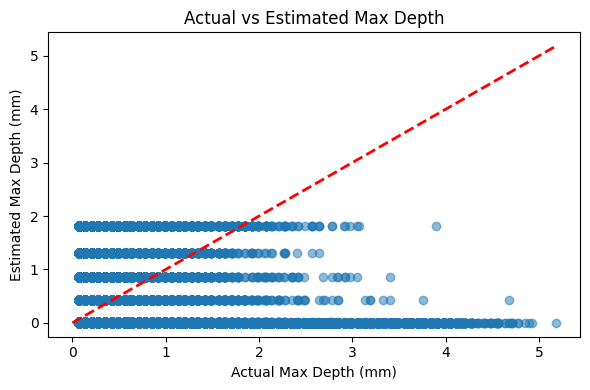

In [17]:
# Create a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(AnomaliesProc_ML_Ready['MaxDepth_mm'], 
            AnomaliesProc_ML_Ready['estimated_max_depth_mm'], 
            alpha=0.5)
plt.plot([0, AnomaliesProc_ML_Ready['MaxDepth_mm'].max()], 
         [0, AnomaliesProc_ML_Ready['MaxDepth_mm'].max()], 
         'r--', lw=2)  # Add a diagonal line for reference
plt.xlabel('Actual Max Depth (mm)')
plt.ylabel('Estimated Max Depth (mm)')
plt.title('Actual vs Estimated Max Depth')
plt.tight_layout()
plt.show()

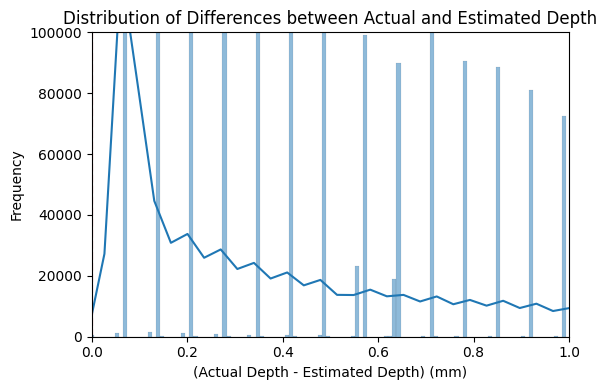

In [18]:
# Create a histogram of the differences
plt.figure(figsize=(6, 4))
differences = AnomaliesProc_ML_Ready['MaxDepth_mm'] - AnomaliesProc_ML_Ready['estimated_max_depth_mm']
sns.histplot(differences, kde=True)
plt.xlabel('(Actual Depth - Estimated Depth) (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Differences between Actual and Estimated Depth')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlim(0, 1)
plt.ylim(0, 100000)
plt.tight_layout()
plt.show()


**Turn the Radial Features to Sin and Cos Cyclic Features**

In [19]:
# List of columns containing angular measurements
angle_columns = ['SeamOrientation_deg', 'StartPointOrientation_deg', 'EndPointOrientation_deg', 'SignificantPointOrientation_deg']

# Function to convert degrees to radians
def deg_to_rad(deg):
    return deg * np.pi / 180

# Create new sine and cosine features for each angular measurement
for col in angle_columns:
    # Convert to radians
    AnomaliesProc_ML_Ready[f'{col}_rad'] = AnomaliesProc_ML_Ready[col].apply(deg_to_rad)
    
    # Create sine component
    AnomaliesProc_ML_Ready[f'{col}_sin'] = np.sin(AnomaliesProc_ML_Ready[f'{col}_rad'])
    
    # Create cosine component
    AnomaliesProc_ML_Ready[f'{col}_cos'] = np.cos(AnomaliesProc_ML_Ready[f'{col}_rad'])

    # drop the original columns
    # AnomaliesProc_ML_Ready.drop(columns=[col, f'{col}_rad'], inplace=True)


In [122]:
class Anomaly_mapping:
    def __init__(self, df):
        self.df = df

    def sort_dataframe(self):
        return self.df.sort_values(['GirthWeldNumber', 'InspectionYear', 'RelativeDistance_m'])

    def filter_girthweld(self, girth_weld_number):
        return self.df[self.df.GirthWeldNumber == girth_weld_number]

    def get_unique_years(self):
        return self.df['InspectionYear'].unique()

    def process_years(self, years):
        results = []
        for i in range(1, len(years)):
            results.extend(self.match_anomalies(years[i-1], years[i]))
        return results

    def match_anomalies(self, previous_year, current_year):
        previous_year_data = self.df[self.df['InspectionYear'] == previous_year].reset_index(drop=True)
        current_year_data = self.df[self.df['InspectionYear'] == current_year].copy().reset_index(drop=True)
        matches = []

        for _, anomaly in current_year_data.iterrows():
            previous_year_data['DistanceDiff'] = np.abs(anomaly['RelativeDistance_m'] - previous_year_data['RelativeDistance_m'])
            previous_year_data['OrientationDiff'] = np.abs(anomaly['SignificantPointOrientation_deg'] - previous_year_data['SignificantPointOrientation_deg'])

            potential_matches = previous_year_data[(previous_year_data['DistanceDiff'] <= 0.05) & 
                                                (previous_year_data['OrientationDiff'] <= 5)].copy()

            if not potential_matches.empty:
                potential_matches['TotalDiff'] = potential_matches['DistanceDiff'] + potential_matches['OrientationDiff']
                closest_match_index = potential_matches['TotalDiff'].idxmin()
                closest_match = previous_year_data.loc[closest_match_index]
                matches.append(self.create_result_dict(anomaly, closest_match, previous_year, True))
            else:
                matches.append(self.create_result_dict(anomaly, None, previous_year, False))

        return matches

    def process_first_year(self, first_year):
        first_year_data = self.df[self.df['InspectionYear'] == first_year].reset_index(drop=True)
        matches = []

        for _, anomaly in first_year_data.iterrows():
            matches.append(self.create_result_dict(anomaly, None, first_year, False))

        return matches

    def create_result_dict(self, anomaly, closest_match, previous_year, is_old):
        if is_old:
            length_change = anomaly['FeatureLength_mm'] - closest_match['FeatureLength_mm']
            width_change = anomaly['FeatureWidth_mm'] - closest_match['FeatureWidth_mm']
            depth_change = anomaly['MaxDepth_mm'] - closest_match['MaxDepth_mm']
            distance_diff = anomaly['RelativeDistance_m'] - closest_match['RelativeDistance_m']
            orientation_diff = anomaly['SignificantPointOrientation_deg'] - closest_match['SignificantPointOrientation_deg']
            return {
                'GirthWeldNumber': anomaly['GirthWeldNumber'],
                'InspectionYear': anomaly['InspectionYear'],
                'RelativeDistance_m': anomaly['RelativeDistance_m'],
                'FeatureLength_mm': anomaly['FeatureLength_mm'],
                'FeatureWidth_mm': anomaly['FeatureWidth_mm'],
                'MaxDepth_mm': anomaly['MaxDepth_mm'],
                'SignificantPointOrientation_deg': anomaly['SignificantPointOrientation_deg'],
                'Prev_InspectionYear': previous_year,
                'Prev_RelativeDistance_m': closest_match['RelativeDistance_m'],
                'Prev_FeatureLength_mm': closest_match['FeatureLength_mm'],
                'Prev_FeatureWidth_mm': closest_match['FeatureWidth_mm'],
                'Prev_MaxDepth_mm': closest_match['MaxDepth_mm'],
                'Prev_SignificantPointOrientation_deg': closest_match['SignificantPointOrientation_deg'],
                'LengthChange': length_change,
                'WidthChange': width_change,
                'DepthChange': depth_change,
                'DistanceDiff': distance_diff,
                'OrientationDiff': orientation_diff,
                'Tag': 'old'
            }
        else:
            return {
                'GirthWeldNumber': anomaly['GirthWeldNumber'],
                'InspectionYear': anomaly['InspectionYear'],
                'RelativeDistance_m': anomaly['RelativeDistance_m'],
                'FeatureLength_mm': anomaly['FeatureLength_mm'],
                'FeatureWidth_mm': anomaly['FeatureWidth_mm'],
                'MaxDepth_mm': anomaly['MaxDepth_mm'],
                'SignificantPointOrientation_deg': anomaly['SignificantPointOrientation_deg'],
                'Prev_InspectionYear': np.nan,
                'Prev_RelativeDistance_m': np.nan,
                'Prev_FeatureLength_mm': np.nan,
                'Prev_FeatureWidth_mm': np.nan,
                'Prev_MaxDepth_mm': np.nan,
                'Prev_SignificantPointOrientation_deg': np.nan,
                'LengthChange': np.nan,
                'WidthChange': np.nan,
                'DepthChange': np.nan,
                'DistanceDiff': np.nan,
                'OrientationDiff': np.nan,
                'Tag': 'new'
            }

    def process_data(self, girth_weld_number):
        self.df = self.sort_dataframe()
        self.df = self.filter_girthweld(girth_weld_number)
        years = self.get_unique_years()

        results = []
        if len(years) >= 1:
            results.extend(self.process_first_year(years[0]))
        if len(years) > 1:
            results.extend(self.process_years(years))

        anomalies_changes = pd.DataFrame(results)
        anomalies_changes = anomalies_changes.sort_values(['InspectionYear', 'RelativeDistance_m'])

        self.df = anomalies_changes.merge(
            self.df, 
            on=['GirthWeldNumber', 'RelativeDistance_m', 'InspectionYear', 'SignificantPointOrientation_deg'], 
            how='left', 
            suffixes=('', '_dup')
        )
        self.df = self.df.drop(columns=[col for col in self.df.columns if '_dup' in col])

        return self.df

In [130]:
import importlib
import tools

# Reload the module to reflect the changes
importlib.reload(tools)

from tools import Anomaly_mapping, plot_anomalies

In [135]:
# Create an instance of the Anomaly_mapping class
mapper = Anomaly_mapping(AnomaliesProc_ML_Ready)

# Process the data for girth weld number 16
AnomaliesProc_Mapped = mapper.process_data(girth_weld_number=16)

# If you need to access intermediate results, you can do so like this:
years = mapper.get_unique_years()
sorted_df = mapper.sort_dataframe()
filtered_df = mapper.filter_girthweld(16)

# If you want to see the results before the final merge:
results = []
if len(years) >= 1:
    results.extend(mapper.process_first_year(years[0]))
if len(years) > 1:
    results.extend(mapper.process_years(years))

anomalies_changes = pd.DataFrame(results)
anomalies_changes = anomalies_changes.sort_values(['InspectionYear', 'RelativeDistance_m'])

# The final AnomaliesProc_Mapped is already available from the process_data method
# But if you want to do the merge manually:
AnomaliesProc_Mapped = anomalies_changes.merge(
    filtered_df, 
    on=['GirthWeldNumber', 'RelativeDistance_m', 'InspectionYear', 'SignificantPointOrientation_deg'], 
    how='left', 
    suffixes=('', '_dup')
)
AnomaliesProc_Mapped = AnomaliesProc_Mapped.drop(columns=[col for col in AnomaliesProc_Mapped.columns if '_dup' in col])

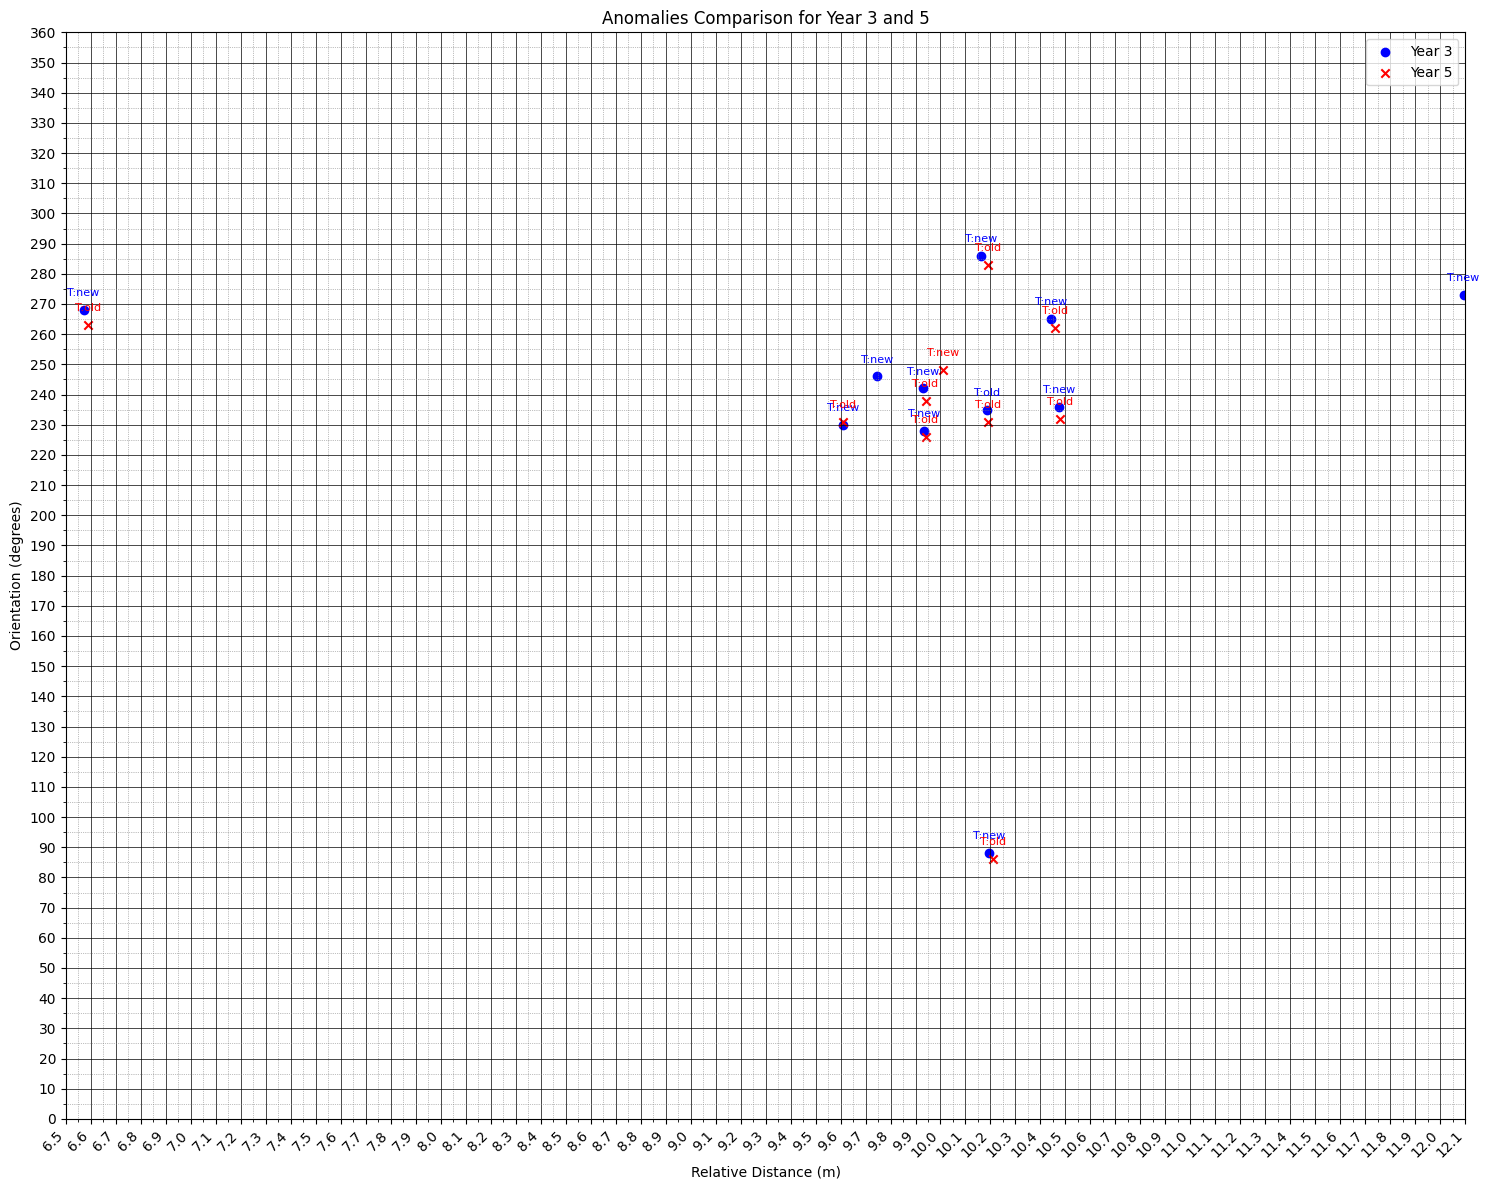

In [136]:
plot_anomalies(AnomaliesProc_Mapped, 3, 5)

In [124]:
anomalies_changes[anomalies_changes.Tag=='old'][['InspectionYear', 'Tag']].count()

InspectionYear    19
Tag               19
dtype: int64

In [ ]:
AnomaliesProc_Mapped[['GirthWeldNumber', 
                    'InspectionYear', 'Prev_InspectionYear',
                    'RelativeDistance_m','Prev_RelativeDistance_m', 'DistanceDiff',
                    'FeatureLength_mm','Prev_FeatureLength_mm', 'LengthChange',
                    'FeatureWidth_mm', 'Prev_FeatureWidth_mm', 'WidthChange',
                    'SignificantPointOrientation_deg', 'Prev_SignificantPointOrientation_deg', 'OrientationDiff',
                    'MaxDepth_mm', 'Prev_MaxDepth_mm', 'DepthChange', 'Tag']]

#### Outlier Removal

In [28]:
# Calculate Z-scores for all numeric columns
z_scores = np.abs(zscore(AnomaliesProc_ML_Ready[['MaxDepth_mm', 'FeatureWidth_mm', 'FeatureLength_mm', 'InspectionYear']], nan_policy='omit'))

# Create a mask for non-outlier data (within 3 standard deviations)
mask = (z_scores < 1).all(axis=1)

# Apply the mask to remove outliers
AnomaliesProc_ML_Ready = AnomaliesProc_ML_Ready[mask]

In [29]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(AnomaliesProc_ML_Ready[['MaxDepth_mm', 'FeatureWidth_mm', 'FeatureLength_mm', 'InspectionYear','SignificantPointRelDistance_m']])

# Keep only the inliers
AnomaliesProc_ML_Ready = AnomaliesProc_ML_Ready[outliers == 1]


#### Class Imbalance

In [ ]:
class_counts = AnomaliesProc_ML_Ready['MaxDepth_mm'].value_counts().sort_index()
print(class_counts)

MaxDepth_mm
0.07    402836
0.14    113852
0.21     99108
0.28     86605
0.35     74240
0.42     63236
0.49     56100
0.57     49327
0.64     43342
0.71     39130
0.78     33786
0.85     28795
0.92     26141
Name: count, dtype: int64


#### Fitting Classification Model

In [22]:
from sklearn.preprocessing import LabelEncoder

# Create a Series from MaxDepth_mm to preserve the index
target_series = AnomaliesProc.MaxDepth_mm

le = LabelEncoder()
target = pd.Series(le.fit_transform(target_series), index=target_series.index)

# Keep all features, including rows where target is an outlier
features = AnomaliesProc_ML_Ready[['FeatureWidth_mm', 
                                   'FeatureLength_mm', 
                                   'InspectionYear', 
                                   'GirthWeldNumber',
                                   'StartPointDistance_m',
                                   'StartPointOrientation_deg', 
                                   'StartPointOrientation_deg_sin',  # New
                                   'StartPointOrientation_deg_cos',  # New
                                   'EndPointDistance_m',
                                   'EndPointOrientation_deg', 
                                   'EndPointOrientation_deg_sin',    # New
                                   'EndPointOrientation_deg_cos',    # New
                                   'SignificantPointRelDistance_m',
                                   'SignificantPointOrientation_deg',
                                   'SignificantPointOrientation_deg_sin',  # New
                                   'SignificantPointOrientation_deg_cos',  # New
                                   'AspectRatio',
                                   'FeatureArea_mm2']]

# Find common indices
common_indices = features.index.intersection(target.index)

# Filter both features and target to keep only rows with common indices
features = features.loc[common_indices]
target = target.loc[common_indices]

# Apply standard scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [35]:
# Define the search space
search_spaces = {
    'learning_rate': Real(0.01, 0.5, prior='log-uniform'),
    'max_iter': Integer(100, 500),
    'max_depth': Integer(3, 10),
    'min_samples_leaf': Integer(5, 50),
    'l2_regularization': Real(1e-6, 1e-2, prior='log-uniform')
}

In [43]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Initialize the base model
base_model = HistGradientBoostingClassifier(random_state=42)

In [51]:
bayes_search = BayesSearchCV(
    base_model,
    search_spaces,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='accuracy',
)

In [ ]:
# Perform the search
bayes_search.fit(X_train, y_train)

In [ ]:
best_params = bayes_search.best_params_
# Print the best parameters
print("Best parameters found:")
print(best_params)

Best parameters found:
OrderedDict([('l2_regularization', 0.002236420282054271), ('learning_rate', 0.3167569558914482), ('max_depth', 5), ('max_iter', 480), ('min_samples_leaf', 44)])


In [53]:
# Initialize the model with the best parameters
best_model = HistGradientBoostingClassifier(
    random_state=42,
    # **best_params
)

In [54]:
# Perform the search
best_model.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

In [55]:
# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# If you have more than two classes, use roc_auc_score with multi_class parameter
if len(np.unique(y_test)) > 2:
    roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')
else:
    roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.4648

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.96      0.70     80916
           1       0.32      0.24      0.28     22884
           2       0.30      0.23      0.26     19786
           3       0.30      0.21      0.24     17393
           4       0.30      0.16      0.21     14719
           5       0.30      0.15      0.20     12630
           6       0.28      0.16      0.20     11083
           8       0.29      0.14      0.19      9788
          10       0.28      0.14      0.19      8747
          11       0.30      0.13      0.18      7837
          12       0.31      0.12      0.17      6850
          13       0.42      0.14      0.21      5703
          14       0.68      0.20      0.31      4964

    accuracy                           0.46    223300
   macro avg       0.36      0.23      0.26    223300
weighted avg       0.40      0.46      0.40    223300


Confusion Matrix:
[[77790  2046   661

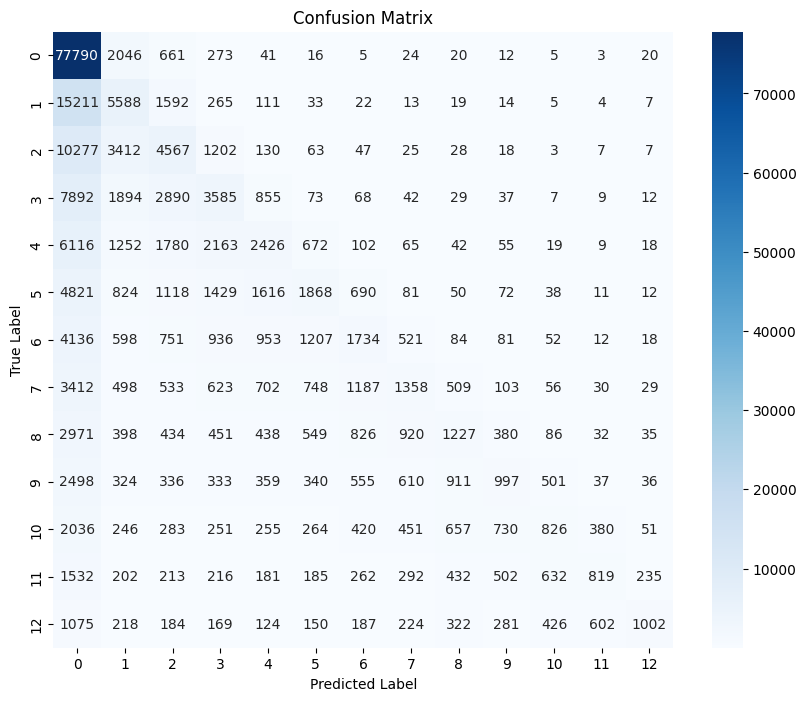

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

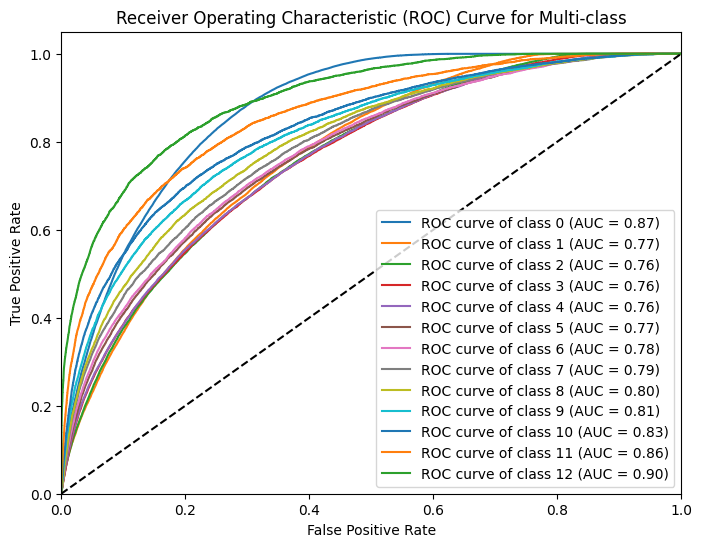

In [57]:
n_classes = len(np.unique(y_test))

# One-vs-Rest ROC curve for multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_score = best_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()

#### Fitting Regressor Model

In [31]:
# Apply the mask to remove outliers only from the target variable
target = AnomaliesProc_ML_Ready['MaxDepth_mm']

# Keep all features, including rows where target is an outlier
features = AnomaliesProc_ML_Ready[['FeatureWidth_mm', 
                                   'FeatureLength_mm', 
                                   'InspectionYear', 
                                   'GirthWeldNumber',
                                   'StartPointDistance_m',
                                   'StartPointOrientation_deg_sin',
                                   'StartPointOrientation_deg_cos',
                                   'EndPointDistance_m',
                                   'EndPointOrientation_deg_sin',
                                   'EndPointOrientation_deg_cos', 
                                   'SignificantPointRelDistance_m',
                                   'SignificantPointOrientation_deg_sin',
                                   'SignificantPointOrientation_deg_cos',
                                   'AspectRatio',
                                   'FeatureArea_mm2',
                                   'estimated_max_depth_mm'
                                   ]]

# Ensure features and target have the same index
features = features.loc[target.index]

# Apply standard scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

**Addressing Class Imbalance**

In [56]:
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.under_sampling import RandomUnderSampler

# Original discretized values
original_discretized_values = np.unique(target)

# Bin the target variable
n_bins = len(original_discretized_values)  # 13 unique values
kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
target_binned = kbins.fit_transform(target.values.reshape(-1, 1)).reshape(-1)

# Convert target_binned to integers
target_binned = target_binned.astype(int)

# Calculate the frequency of each bin
bin_counts = np.bincount(target_binned)

# Define the desired number of samples for each bin
median_freq = np.median(bin_counts)
sampling_strategy = {i: min(count, int(median_freq)) for i, count in enumerate(bin_counts) if count > 0}

# Apply Random Undersampling
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
features_resampled, target_resampled_binned = rus.fit_resample(features, target_binned)

# Map the binned target back to original discretized values
target_resampled = original_discretized_values[target_resampled_binned]

# Verify the resulting values match the original discretized values
print("Original discretized values:")
print(original_discretized_values)
print("Resulting values after resampling and mapping back:")
print(target_resampled)


Original discretized values:
[0.07 0.14 0.21 0.28 0.35 0.42 0.49 0.57 0.64 0.71 0.78 0.85 0.92]
Resulting values after resampling and mapping back:
[0.07 0.07 0.07 ... 0.92 0.92 0.92]


In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2, random_state=42)

In [44]:
# Define the search space
search_spaces = {
    'learning_rate': Real(0.01, 0.5, prior='log-uniform'),
    'max_iter': Integer(100, 500),
    'max_depth': Integer(3, 10),
    'min_samples_leaf': Integer(5, 50),
    'l2_regularization': Real(1e-6, 1e-2, prior='log-uniform')
}

In [110]:
# Initialize the base model
base_model = HistGradientBoostingRegressor(random_state=42)

In [111]:
# Define the callback
delta_y_stopper = DeltaYStopper(delta=0.001)

In [112]:
# Initialize BayesSearchCV
bayes_search = BayesSearchCV(
    base_model,
    search_spaces,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='neg_mean_squared_error')

In [113]:
# Perform the search
bayes_search.fit(X_train[y_train.notnull()], y_train[y_train.notnull()], callback=[delta_y_stopper])

BayesSearchCV(cv=5, estimator=HistGradientBoostingRegressor(random_state=42),
              n_jobs=-1, random_state=42, scoring='neg_mean_squared_error',
              search_spaces={'l2_regularization': Real(low=1e-06, high=0.01, prior='log-uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=0.5, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'max_iter': Integer(low=100, high=500, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=5, high=50, prior='uniform', transform='normalize')})

In [114]:
best_params = bayes_search.best_params_
# Print the best parameters
print("Best parameters found:")
print(best_params)

Best parameters found:
OrderedDict([('l2_regularization', 4.1212049403170185e-05), ('learning_rate', 0.4922350650601152), ('max_depth', 7), ('max_iter', 499), ('min_samples_leaf', 47)])


In [64]:
# Initialize the model with the best parameters
# best_model = HistGradientBoostingRegressor(
#     random_state=42,
#     **best_params
# )

best_model = HistGradientBoostingRegressor(
    l2_regularization=4.1212049403170185e-05,
    learning_rate=0.4922350650601152,
    max_depth=7,
    max_iter=499,
    min_samples_leaf=47,
    random_state=42
)

In [65]:
# Perform the search
best_model.fit(X_train, y_train)

HistGradientBoostingRegressor(l2_regularization=4.1212049403170185e-05,
                              learning_rate=0.4922350650601152, max_depth=7,
                              max_iter=499, min_samples_leaf=47,
                              random_state=42)

In [66]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_true = y_test

# Evaluate the model
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
me = np.mean(y_true - y_pred)  # Mean Error


print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
print(f"Mean Error (ME): {me:.4f}")

Root Mean Squared Error (RMSE): 0.1568
Mean Absolute Error (MAE): 0.1126
R-squared (R²) Score: 0.6027
Mean Absolute Percentage Error (MAPE): 65.3053%
Mean Error (ME): 0.0005


With SMOT
Root Mean Squared Error (RMSE): 0.1598
Mean Absolute Error (MAE): 0.1245
R-squared (R²) Score: 0.5734
Mean Absolute Percentage Error (MAPE): 37.8674%
Mean Error (ME): 0.0001


Root Mean Squared Error (RMSE): 0.1551
Mean Absolute Error (MAE): 0.1112
R-squared (R²) Score: 0.6102
Mean Absolute Percentage Error (MAPE): 64.0431%
Mean Error (ME): 0.0001

In [95]:
# Assuming best_hgb_model is already fitted
# y_pred = best_model.predict(X_test)

# Create a DataFrame for easier plotting
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

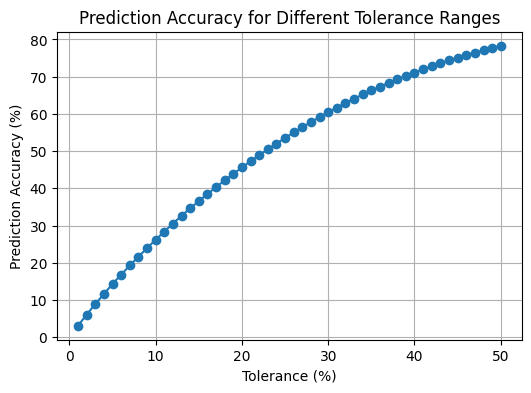

In [96]:
# Define a range of tolerance values
tolerances = np.arange(0.01, 0.51, 0.01)  # Tolerances from 1% to 30%

# Calculate prediction accuracy for each tolerance value
accuracies = []
for tolerance in tolerances:
    accuracy = np.mean(np.abs((y_test - y_pred) / y_test) < tolerance) * 100
    accuracies.append(accuracy)

# Plot the results
plt.figure(figsize=(6, 4))
plt.plot(tolerances * 100, accuracies, marker='o')
plt.xlabel('Tolerance (%)')
plt.ylabel('Prediction Accuracy (%)')
plt.title('Prediction Accuracy for Different Tolerance Ranges')
plt.grid(True)
plt.show()

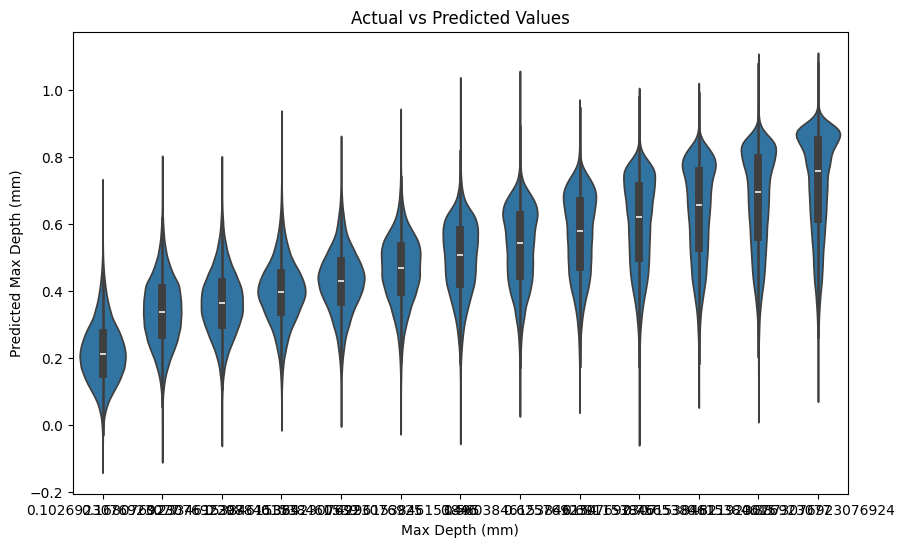

In [97]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Actual', y='Predicted', data=results)

plt.xlabel('Max Depth (mm)')
plt.ylabel('Predicted Max Depth (mm)')
plt.title('Actual vs Predicted Values')
plt.show()

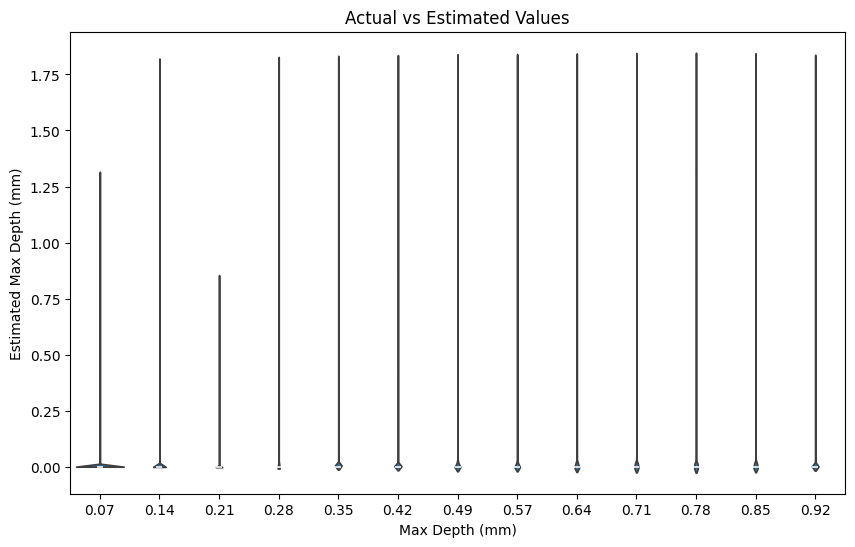

In [58]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='MaxDepth_mm', y='estimated_max_depth_mm', data=AnomaliesProc_ML_Ready)

plt.xlabel('Max Depth (mm)')
plt.ylabel('Estimated Max Depth (mm)')
plt.title('Actual vs Estimated Values')
plt.show()

In [ ]:
# Predict missing values
AnomaliesProc_ML_Ready.loc[AnomaliesProc_ML_Ready['MaxDepth_mm'].isnull(), 'MaxDepth_mm_predicted'] = best_model.predict(scaler.transform(features[AnomaliesProc_ML_Ready['MaxDepth_mm'].isnull()]))

# Check for remaining missing values
missing_values_remaining = AnomaliesProc_ML_Ready['MaxDepth_mm'].isnull().sum()

print(f"Number of remaining missing values in 'MaxDepth_mm': {missing_values_remaining}")

In [ ]:
# Show only the records where the max depth is predicted
predicted_records = AnomaliesProc_ML_Ready[AnomaliesProc_ML_Ready['MaxDepth_mm'].isnull()]
print(predicted_records)